<a href="https://colab.research.google.com/github/rohit-pie/Spotle-Covid-Analysis/blob/main/SpotleCovidAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Spotle Covid Twitter Data Analysis**

## **- Rohit Narayanan**
### **- National Institute of Technology Puducherry**

# Introduction

This is a complete extravagant report of the Twitter Data related to covid times. The dataset is analyzed using Python and constructive conclusions and inferences are reached at. This report presents both the **analytical side and the inferential side**, thus being an inseparable combo in the same file.



# **1) Installing PyDrive for uploading raw data**

We import GoogleAuth, GoogleDrive, auth, GoogleCredentials modules for easy data upload from our Google drives. Then we authenticate and create a PyDrive client. We then click on the link, authenticate with our Gmail account and copy the generated code into the given space, to get ourselves authenticated. Now get the GDrive link for our file, and get the contents in to our workspace. 

In [ ]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 

from pydrive.drive import GoogleDrive 

from google.colab import auth 

from oauth2client.client import GoogleCredentials 

In [ ]:
auth.authenticate_user() 

gauth = GoogleAuth() 

gauth.credentials = GoogleCredentials.get_application_default() 

drive = GoogleDrive(gauth)

In [ ]:
link='https://drive.google.com/file/d/1xy8BBnINILiZMFSwpzC8Rq3KwUEHBLjo/view?usp=sharinghttps://drive.google.com/file/d/1xy8BBnINILiZMFSwpzC8Rq3KwUEHBLjo/view?usp=sharing'

import pandas as pd 

id = link.split("/")[-2] 

downloaded = drive.CreateFile({'id':id}) 

downloaded.GetContentFile('CovidTwitterAnalysis.csv') 

df = pd.read_csv('CovidTwitterAnalysis.csv') 

print(df)

                           created_at  ... user_statuses_count
0      Wed Mar 25 06:20:02 +0000 2020  ...                1770
1      Wed Mar 25 06:36:25 +0000 2020  ...                  73
2      Wed Mar 25 06:18:32 +0000 2020  ...                6002
3      Wed Mar 25 06:05:46 +0000 2020  ...                1387
4      Wed Mar 25 06:31:10 +0000 2020  ...                  13
...                               ...  ...                 ...
44174  Thu May 07 03:46:30 +0000 2020  ...                9457
44175  Thu May 07 02:57:32 +0000 2020  ...                3433
44176  Thu May 07 03:47:42 +0000 2020  ...               23734
44177  Thu May 07 03:48:04 +0000 2020  ...               15185
44178  Thu May 07 03:48:08 +0000 2020  ...                6931

[44179 rows x 19 columns]


# **2) Importing required Python libraries and modules**

Tweepy - Python library for accessing the Twitter API.

TextBlob - Python library for processing textual data

WordCloud - Python library for creating image wordclouds

Pandas - Data manipulation and analysis library

NumPy - mathematical functions on multi-dimensional arrays and matrices

Regular Expression Python module

Matplotlib - plotting library to create graphs and charts

Settings for Matplotlib graphs and charts

nltk - for text manipulation


In [ ]:
import tweepy

from textblob import TextBlob

from wordcloud import WordCloud

import pandas as pd

import numpy as np

import re

from ipywidgets import *

import seaborn as sns

import matplotlib.pyplot as plt

from pylab import rcParams

rcParams['figure.figsize'] = 12, 8

import string

import nltk 

import warnings 

warnings.filterwarnings("ignore", category=DeprecationWarning)

import mpl_toolkits

import io

%matplotlib inline

# **3) Characteristics of the data. How the given data looks**

head()-This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

describe()- It is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution.

dtypes-It returns a Series with the data type of each column.

shape()- This gets the number of rows and columns

drop()-It removes rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names

duplicated()- It returns a boolean Series denoting duplicate rows.

count()- It counts non-NA cells for each column or row for any specified condition.

drop_duplicates() -It return DataFrame with duplicate rows removed.



In [ ]:
df.head()

,created_at,hashtags,favorite_count,id,lang,place,retweet_count,text,tweet_url,user_screen_name,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count
0,Wed Mar 25 06:20:02 +0000 2020,NaN,0,1242697733175220000,en,"Pune, India",0,Meditation and mindfulness tips for coping wit...,https://twitter.com/ShalomFloat/status/1242697...,ShalomFloat,Shalom float spa is the first dedicated float ...,252,382,97,24,India,Shalom Float Spa,ShalomFloat,1770
1,Wed Mar 25 06:36:25 +0000 2020,NaN,0,1242701857253980000,en,"Gandhinagar, India",0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,https://twitter.com/prakashkalal/status/124270...,prakashkalal,NaN,693,175,107,0,"Gandhinagar, India",prks7,prakashkalal,73
2,Wed Mar 25 06:18:32 +0000 2020,NaN,0,1242697356249880000,en,"Bidhan Nagar, India",0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,https://twitter.com/Bhartendulkar/status/12426...,Bhartendulkar,Senior Media Analyst @Indianpac | Ex Sr Report...,5273,609,2239,7,"Kolkata, India",Bhartendu Sharma,Bhartendulkar,6002
3,Wed Mar 25 06:05:46 +0000 2020,SSC_UFM_MAT_KARONA Corona UFM,9,1242694142242650000,en,"Maharashtra, India",19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,https://twitter.com/patilkiii/status/124269414...,patilkiii,"Ab khushi de ke aazma le khuda, In ghamon se t...",1744,259,786,0,"Pune, India",ùï¨ùñáùñçùñéùñëùñÜùñòùñç ùïæùñöùñì...,patilkiii,1387
4,Wed Mar 25 06:31:10 +0000 2020,Corona pritamkumarmurari Voice,0,1242700536752700000,en,"Bokaro Steel City, India",0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,https://twitter.com/SINGERMurariPa1/status/124...,SINGERMurariPa1,"Singing,Dancing,Acting,Entertainment",4,2,163,0,‡§¨‡•ã‡§ï‡§æ‡§∞‡•ã ‡§∏‡•ç‡§ü‡•Ä‡§≤ ‡§∏‡§ø‡§ü‡•...,SINGER=Murari Pathak,SINGERMurariPa1,13


In [ ]:
df.describe()

,favorite_count,id,retweet_count,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count
count,44179.000000,4.417900e+04,44179.000000,44179.000000,4.417900e+04,44179.000000,44179.000000,4.417900e+04
mean,8.688834,1.249746e+18,2.037122,15413.078906,6.076601e+03,908.844723,15.648951,1.830381e+04
std,690.196275,5.513385e+15,110.332251,42971.397214,1.494865e+05,5802.053827,86.748546,5.619829e+04
min,0.000000,1.242693e+18,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00
25%,0.000000,1.244130e+18,0.000000,233.000000,3.400000e+01,98.000000,0.000000,3.990000e+02
50%,0.000000,1.250482e+18,0.000000,2192.000000,1.750000e+02,293.000000,0.000000,2.476000e+03
75%,1.000000,1.256266e+18,0.000000,11439.000000,8.890000e+02,843.000000,5.000000,1.330600e+04
max,144012.000000,1.258242e+18,22549.000000,638151.000000,1.827721e+07,316697.000000,5775.000000,2.117851e+06


In [ ]:
df.dtypes

created_at               object
hashtags                 object
favorite_count            int64
id                        int64
lang                     object
place                    object
retweet_count             int64
text                     object
tweet_url                object
user_screen_name         object
user_description         object
user_favourites_count     int64
user_followers_count      int64
user_friends_count        int64
user_listed_count         int64
user_location            object
user_name                object
user_screen_name.1       object
user_statuses_count       int64
dtype: object

In [ ]:
df = df.drop(['created_at', 'id', 'lang', 'place', 'tweet_url', 'user_screen_name','user_description' ,'user_location', 'user_name', 'user_screen_name.1'], axis=1)

In [ ]:
df.shape

(44179, 9)

In [ ]:
duplicate_rows_df = df[df.duplicated()]

print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (105, 9)


In [ ]:
df.count()

hashtags                 17907
favorite_count           44179
retweet_count            44179
text                     44179
user_favourites_count    44179
user_followers_count     44179
user_friends_count       44179
user_listed_count        44179
user_statuses_count      44179
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.count()

hashtags                 17873
favorite_count           44074
retweet_count            44074
text                     44074
user_favourites_count    44074
user_followers_count     44074
user_friends_count       44074
user_listed_count        44074
user_statuses_count      44074
dtype: int64

# **4) Detecting and analyzing Subjectivity and Polarity of the tweets**

This creates a function that determines subjectivity and polarity from the textblob package and then apply these functions to the dataframe. Then we build a function to calculate and categorize each tweet as Positive, Neutral, and  Negative. Finally we create another column "Score" and apply the function to the dataframe.

Then we move on to visualizing and summarizing the data. 

Here we will be having the following

1) Bar plot - Polarity

2) Scatter plot - Subjectivity vs Polarity

3) Number of subjective and objective tweets

4) Number of positive, negative and neutral tweets.


In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
df['Subjectivity'] = df['text'].apply(getTextSubjectivity)

df['Polarity'] = df['text'].apply(getTextPolarity)

In [ ]:
df = df.drop(df[df['text'] == ''].index)

df.head(50)

,hashtags,favorite_count,retweet_count,text,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,Subjectivity,Polarity
0,NaN,0,0,Meditation and mindfulness tips for coping wit...,252,382,97,24,1770,0.750000,0.125000
1,NaN,0,0,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,693,175,107,0,73,0.000000,0.000000
2,NaN,0,0,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,5273,609,2239,7,6002,0.000000,0.000000
3,SSC_UFM_MAT_KARONA Corona UFM,9,19,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,1744,259,786,0,1387,0.522222,0.033333
4,Corona pritamkumarmurari Voice,0,0,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,4,2,163,0,13,1.000000,0.600000
5,NaN,0,0,@chintskap And my mum will be PhD in Corona vi...,690,13,381,0,170,0.000000,0.000000
6,NaN,0,0,"@funnyhammy @GauravPandhi Dumbo, it's the amou...",50620,3851,4938,6,56330,0.375000,-0.125000
7,NaN,64,12,. First they allowed Corona possessions. Now t...,3905,738362,384,592,37805,0.429365,0.080952
8,NaN,0,0,@TV9Marathi \nKindly help us to break the chai...,164,11,55,0,75,0.900000,0.600000
9,NaN,1,0,"When you are at safe at home, Corona is out bu...",69,188,253,0,674,0.516667,0.333333


In [ ]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [ ]:
positive = df[df['Score'] == 'Positive']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

47.256886146027135 % of positive tweets


In [ ]:
negative = df[df['Score'] == 'Negative']

print(str(negative.shape[0]/(df.shape[0])*100) + " % of negative tweets")

20.28406770431547 % of negative tweets


In [ ]:
neutral = df[df['Score'] == 'Neutral']

print(str(neutral.shape[0]/(df.shape[0])*100) + " % of neutral tweets")

32.4590461496574 % of neutral tweets


<BarContainer object of 3 artists>

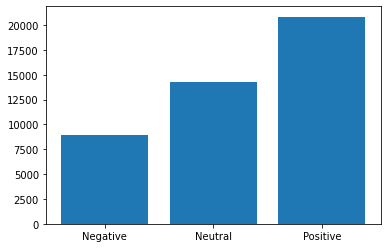

In [ ]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

KeyboardInterrupt: ignored

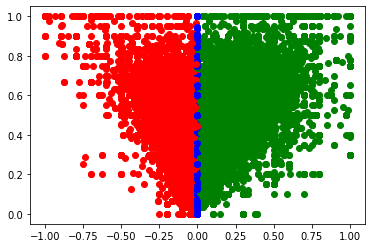

In [ ]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')

plt.xlabel('Polarity')

plt.ylabel('Subjectivity')

plt.show()

In [ ]:
objective = df[df['Subjectivity'] == 0]

print(str(objective.shape[0]/(df.shape[0])*100) + " % of objective tweets")

25.97903525888279 % of objective tweets


In [ ]:
subjective = df[df['Subjectivity'] != 0]

print(str(subjective.shape[0]/(df.shape[0])*100) + " % of subjective tweets")

74.02096474111721 % of subjective tweets


**Results from this section are:**

Polarity

>47.256886146027135 % of positive tweets

>20.28406770431547 % of negative tweets

>32.4590461496574 % of neutral tweets

Subjectivity

> 74.02096474111721 % of subjective tweets

>25.97903525888279 % of objective tweets



# **5) Wordcloud creation and frequency analysis**

These are the tasks we are going to perform here

1) Creating a word cloud

2) Hashtag analysis

> 2.1) Total number of hashtags

> 2.2) Total number of unique hashtags - Both case-sensitive and case-insensitive


> 2.3) Sort hashtags based on frequency and compute top n hashtags

> 2.4) Graphical representation

3) Twitter handle analysis

> 3.1) Total number of handles

> 3.2) Total number of unique handles - Both case-sensitive and case-insensitive

> 3.3) Sort handles based on frequency and compute top n handles

> 3.4) Graphical representation













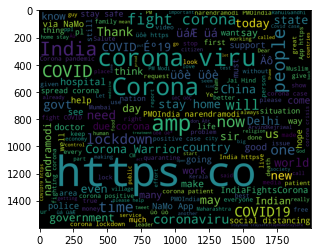

In [ ]:
# Creating a word cloud

words = ' '.join([tweet for tweet in df['text']])

wordCloud = WordCloud(width=2000, height=1600).generate(words)

plt.imshow(wordCloud)

plt.show()

In [ ]:
def make_frequency_list(wordlist):
    freq = dict()
    
    for word in wordlist:
        if word in freq.keys():
            freq[word] += 1
        else:
            freq[word] = 1
    return freq

In [ ]:
# Separating out handles

handles_pattern = r'@\w+'

handles = nltk.regexp_tokenize(" ".join([word for word in df['text']]), handles_pattern)

print("Total number of Twitter-handles in the tweets:", len(handles))

# Make a frequency list of handles(case sensitive)

handles_freq = make_frequency_list(handles)

print("Total number of Unique Twitter-handles(case sensitive):", len(handles_freq.keys()))

# Make a frequency list of handles(case insensitive)

handles_case_insensitive = list(map(str.lower, handles))

handles_freq_in = make_frequency_list(handles_case_insensitive)

print("Total number of Unique tags(case insensitive):", len(handles_freq_in.keys()))

Total number of Twitter-handles in the tweets: 59748
Total number of Unique Twitter-handles(case sensitive): 15453
Total number of Unique tags(case insensitive): 15334


In [ ]:
# Separating out hashtags

hashtags_pattern = r'#\w+'

hashtags = nltk.regexp_tokenize(" ".join([word for word in df['text']]), hashtags_pattern)

print("Total number of hashtags in the tweets:", len(hashtags))

# Make a frequency list of hashtags(case sensitive)

hashtag_freq = make_frequency_list(hashtags)

print("Total number of Unique tags(case sensitive):", len(hashtag_freq.keys()))

# Make a frequency list of hashtags(case insensitive)

hashtags_case_insensitive = list(map(str.lower, hashtags))

hashtag_freq_in = make_frequency_list(hashtags_case_insensitive)

print("Total number of Unique tags(case insensitive):", len(hashtag_freq_in.keys()))

Total number of hashtags in the tweets: 60539
Total number of Unique tags(case sensitive): 15092
Total number of Unique tags(case insensitive): 13220


In [ ]:
def sort_dictionary(dictionary, ascending=True):
    return {key: value for key, value in sorted(dictionary.items(), key=lambda item: item[1], reverse=(not ascending))}

In [ ]:
def bar_plot(labels, values, title, xlabel, n):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    for i in range(n):
       plt.text(i, values[i], str(values[i]))
    plt.xticks(range(n), labels=labels, rotation=90)
    plt.bar(range(n), height=values)


In [ ]:
# Top n hashtags

sorted_hashtags_freq = sort_dictionary(hashtag_freq, ascending=False)

@interact(n=(5, 50, 5))

def plot_histogram(n):
    labels = list(sorted_hashtags_freq.keys())[:n]
    values = list(sorted_hashtags_freq.values())[:n]
    bar_plot(labels, values, "Top "+str(n)+" trending hashtags on Twitter during this Lockdown", "Hashtags", n)
    
    return

interactive(children=(IntSlider(value=25, description='n', max=50, min=5, step=5), Output()), _dom_classes=('w…

In [ ]:
# Top n handles

sorted_handles_freq = sort_dictionary(handles_freq, ascending=False)

@interact(n=(5, 50, 5))

def plot_histogram(n):
    labels = list(sorted_handles_freq.keys())[:n]
    values = list(sorted_handles_freq.values())[:n]
    bar_plot(labels, values, "Top "+str(n)+" trending handles on Twitter during this Lockdown", "Handles", n)
    return

interactive(children=(IntSlider(value=25, description='n', max=50, min=5, step=5), Output()), _dom_classes=('w…

In [ ]:
print(df['hashtags'].value_counts().head(20))

Corona                                                  419
IndiaFightsCorona                                       353
COVID19                                                 296
corona                                                  222
COVID                                                   175
coronavirus                                             165
COVID„Éº19                                              164
GSTFreeCorona                                           117
OndrinaivomVaa                                           89
CoronaRisk_ReleaseAsaramBapuji                           80
CoronaRiskForPrisoners                                   77
PMCARES                                                  75
LetUsPrayForCoronaFighters                               67
CoronaWarriors                                           61
SupportLockdownStaySafe                                  58
IndiaUnitedAgainstCorona                                 58
Covid19                                 

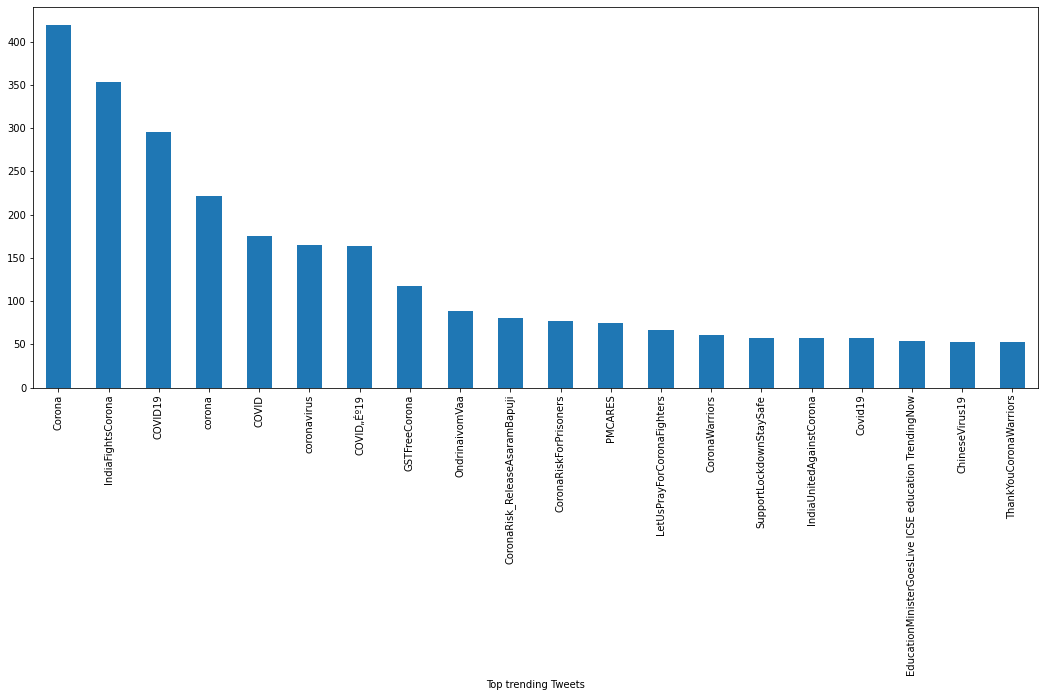

In [ ]:
fig, ax = plt.subplots()

plt.xlabel('Top trending Tweets')

df['hashtags'].value_counts().head(20).plot(ax=ax, kind='bar',figsize=(18,7));

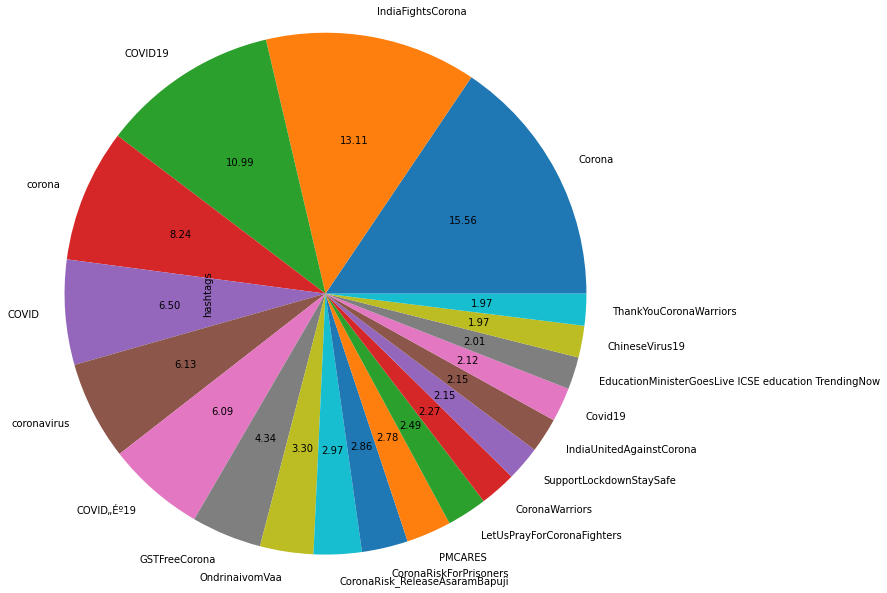

In [ ]:
df['hashtags'].value_counts().head(20).plot(kind='pie', autopct='%.2f', radius=3);

In [ ]:
raw = ' '.join([word for word in df['text']])

tags = [re.sub(r"(\W+)$", "", j[1:]) for j in [i for i in raw.split() if i.startswith("@") and len(i) != 1 ]]

df1 = pd.DataFrame({"handlers": tags})

In [ ]:
df1_count= df1['handlers'].value_counts().head(15)

print(df1_count)

narendramodi       3656
PMOIndia           2697
AmitShah            732
ArvindKejriwal      713
MoHFW_INDIA         535
myogiadityanath     510
CMOMaharashtra      487
RahulGandhi         462
aajtak              425
BJP4India           347
WHO                 336
drharshvardhan      324
realDonaldTrump     301
HMOIndia            290
INCIndia            275
Name: handlers, dtype: int64


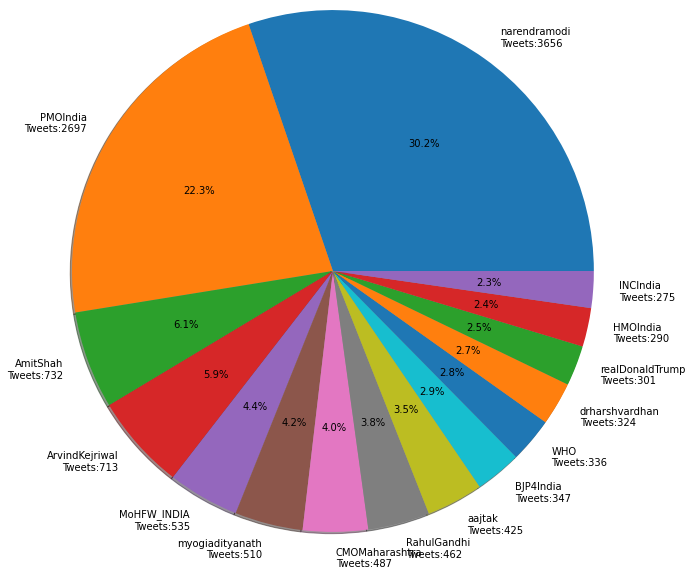

In [ ]:
def add(a, b):
    return a+'\nTweets:'+str(b)

plt.pie(df1_count, autopct='%1.1f%%', shadow=True,  radius=3, labels=list(map(add,df1_count.index.values, df1_count)));

plt.show();

**Results from this section are:**

**Twitter handles**

> Total number of Twitter-handles in the tweets: 59748

> Total number of Unique Twitter-handles(case sensitive): 15453

> Total number of Unique tags(case insensitive): 15334

> Top 5 handles

>> @narendramodi

>>@PMOIndia

>>AmitShah

>>@ArvindKejriwal

>>@MoHFW_INDIA



**Hashtags**

> Total number of hashtags in the tweets: 60539

> Total number of Unique tags(case sensitive): 15092

> Total number of Unique tags(case insensitive): 13220

> Top 5 hashtags

>> Corona

>>IndiaFightsCorona 

>>COVID19

>>corona

>>COVID




# **6) Different plots**

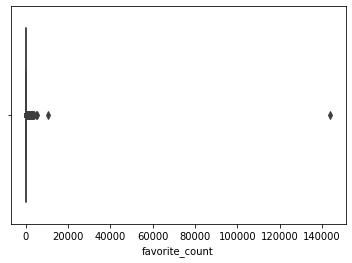

In [ ]:
sns.boxplot(x=df['favorite_count'])

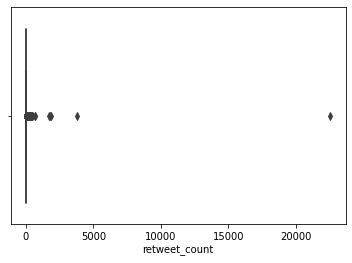

In [ ]:
sns.boxplot(x=df['retweet_count'])

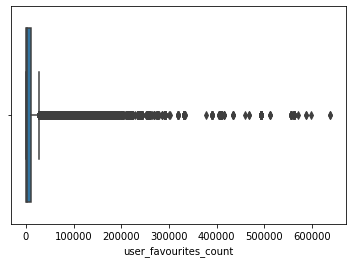

In [ ]:
sns.boxplot(x=df['user_favourites_count'])

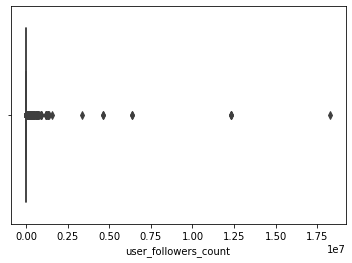

In [ ]:
sns.boxplot(x=df['user_followers_count'])

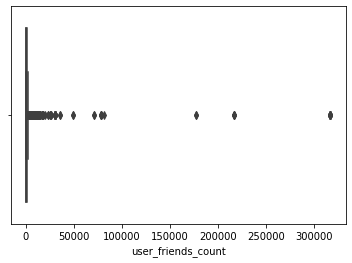

In [ ]:
sns.boxplot(x=df['user_friends_count'])

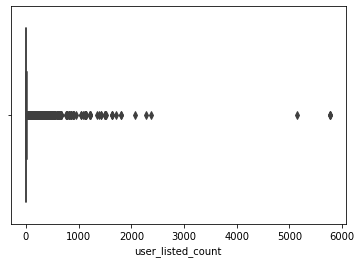

In [ ]:
sns.boxplot(x=df['user_listed_count'])

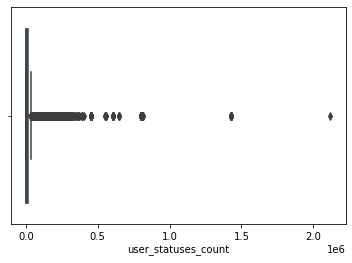

In [ ]:
sns.boxplot(x=df['user_statuses_count'])

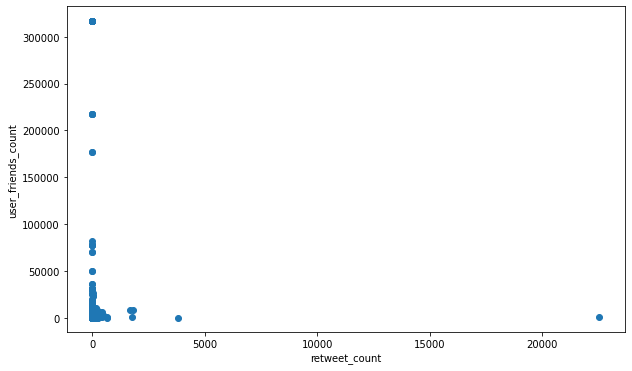

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df['retweet_count'], df['user_friends_count'])

ax.set_xlabel('retweet_count')

ax.set_ylabel('user_friends_count')

plt.show()

# **7) Conclusion**

The Covid infection keeps on spreading across the world after a direction that is hard to anticipate. The wellbeing, helpful and financial approaches received by nations will decide the speed and strength of the recuperation. 


A planned worldwide exertion is needed to help nations that presently don't have adequate monetary space to fund social approach, specifically, widespread social insurance frameworks 


Not every person was ready for the trial of the pandemic. Much under the current conditions, when worldwide difficulties should join individuals and impel individuals to even briefly fail to remember divergences, some actually resort to abuse. Not every person can oppose the enticement of being narrow minded. Others additionally exploit the circumstance to play international affairs by pursuing their own advantages and retribution against their international adversaries. Once reared in such a climate, the infection will strengthen clashes and increase uncalled for rivalry. 


It's an ideal opportunity to surrender regular intuition dependent on generalizations, and begin acting from an ethical viewpoint. All things considered, our smartest option is a cheerful future for all who live on Earth, our regular home.

# ***Let us all pray for such a time to come as soon as possible, and also for a better Earth to live in. ***


##**Rohit Narayanan**

##**National Institute of Technology Puducherry**

Email:rohitnarayanan1729@gmail.com